In [3]:
from fastai.vision.all import *

In [38]:
PATH_INPUT = "./data/"
PATH_OUPUT = "./model/"

# Explore

In [23]:
images_ = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

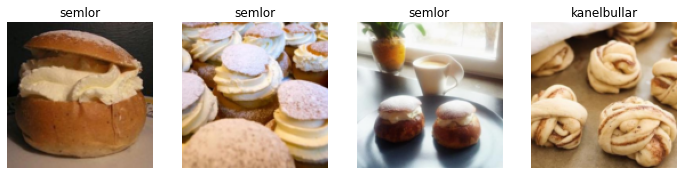

In [24]:
dls_ = images_.dataloaders(PATH_INPUT)
dls_.valid.show_batch(max_n=4, nrows=1)

# Prepare

In [33]:
images = images_.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = images.dataloaders(PATH_INPUT, num_workers=0, bs=8)

In [34]:
learn = vision_learner(
    dls=dls,
    arch=resnet18,
    metrics=error_rate
)

/home/amaurym/Documents/PROJECTS/matenn/env/lib/python3.8/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/home/amaurym/Documents/PROJECTS/matenn/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Train

In [35]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.028999,0.358065,0.214286,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.981686,0.117265,0.071429,00:10
1,0.638402,0.062561,0.071429,00:10
2,0.580796,0.036720,0.000000,00:09
3,0.438219,0.044001,0.000000,00:09
4,0.447134,0.048509,0.000000,00:09


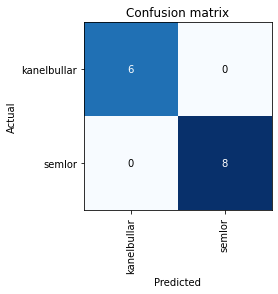

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#interp.plot_top_losses(5, nrows=1)

# Export

In [40]:
learn.export()